# Library

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [56]:
import os
import csv
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import matplotlib.pyplot as plt

# Data

In [3]:
X_Data = np.loadtxt("X_Training.txt", dtype=np.float32)
Y_Data = np.loadtxt("Y_Training.txt", dtype=np.float32)

Features = 9 # Information: Frame, Track ID, 3D Dimensions (H, W, L), 3D Location (X,Y,Z), Rotation Y
X_Data = X_Data.reshape(X_Data.shape[0], X_Data.shape[1] // Features, Features)

X_Data = torch.tensor(X_Data)
Y_Data = torch.tensor(Y_Data)

print(X_Data.shape, type(X_Data))
print(Y_Data.shape, type(Y_Data))
print('-'.center(60,'-'))
# Information: 3D Dimensions (H, W, L), 3D Location (X,Y,Z), Rotation Y
X_Data = X_Data[:,:,2:9]
Y_Data = Y_Data[:,2:9]

print(X_Data.shape)
print(Y_Data.shape)

torch.Size([133, 5, 9]) <class 'torch.Tensor'>
torch.Size([133, 9]) <class 'torch.Tensor'>
------------------------------------------------------------
torch.Size([133, 5, 7])
torch.Size([133, 7])


# Model

## Model 1

In [19]:
data_x = X_Data[0:125]
data_y = Y_Data[0:125]

print(data_x.shape)
print(data_y.shape)

batch_size = 125
lote = 5
t = data_x.reshape(int(batch_size/lote),5,5,7)
o = data_y.reshape(int(batch_size/lote),lote,7)

print(t.shape)
print(o.shape)

torch.Size([125, 5, 7])
torch.Size([125, 7])
torch.Size([25, 5, 5, 7])
torch.Size([25, 5, 7])


In [87]:
class RNNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        
        super(RNNModel, self).__init__()
        
        self.hidden_dim = hidden_dim #Hidden Dimension
        self.layer_dim = layer_dim # Number of hidden layers

        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu') #Building the RNN       
        self.fc = nn.Linear(hidden_dim, output_dim) # Readout layer
        
    def forward(self, x):
        # Initializing the hidden state with zeros
        # (layer_dim, batch_size, hidden_dim)
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
        
        #One time step (the last one perhaps?)
        out, hn = self.rnn(x, h0)
        
        # Indexing hidden state of the last time step
        # out.size() --> ??
        #out[:,-1,:] --> is it going to be 100,100
        out = self.fc(out[:,-1,:])
        # out.size() --> 100,1
        return out

In [88]:
# Parameters
input_dim = 7
hidden_dim = 150
layer_dim = 1
output_dim = 7
batch_size = 25
seq_dim = 5

In [89]:
# Input Test
x = X_Data[0]
x = x.reshape(1,5,7)
x.shape
model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)
out = model(x)
print(X_Data.shape)
print(out.shape)
print(out)

torch.Size([133, 5, 7])
torch.Size([1, 7])
tensor([[-0.0013, -0.0141, -0.3464,  0.4851, -0.3214,  0.2022,  0.3500]],
       grad_fn=<AddmmBackward>)


In [90]:
# Train Data

batch_size = 133
lote = 1

XT_Data = X_Data.reshape(int(batch_size/lote),lote,5,7)
YT_Data = Y_Data.reshape(int(batch_size/lote),lote,7)
print(t.shape)
print(o.shape)

X_train = XT_Data[:100]
X_test  = XT_Data[101:]
y_train = YT_Data[:100]
y_test  = YT_Data[101:]

torch.Size([133, 1, 5, 7])
torch.Size([133, 1, 7])


In [91]:
# Instantiating Loss Class
criterion = nn.MSELoss()

# Instantiate Optimizer Class
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)



In [92]:
for epoch in range(num_epochs):
    
    for i,(X, Y) in enumerate(zip(XT_Data, YT_Data)):
        
#         print('-'.center(60,'-'))
        if (i+1) % 100 == 0:
#             print('Hola',i)
            pass

In [96]:
# initializing lists to store losses over epochs:
train_loss = []
test_loss = []
train_iter = []
test_iter = []

n_total_steps = len(X_train)
num_epochs = 200

for epoch in range(num_epochs):
    
    for i,(X, Y) in enumerate(zip(X_train, y_train)):
        
#         print('-'.center(60,'-'))       
        optimizer.zero_grad()
        outputs = model(X)  

        
        loss = criterion(outputs,Y)
#         print(loss)
        
        train_loss.append(loss.data.tolist())

        
        # Backward and optimize        
        loss.backward()
        
        optimizer.step()

        
        if (i+1) % 100 == 0:
            print('-'.center(60,'-'))       
            
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

------------------------------------------------------------
Epoch [1/200], Step [100/100], Loss: 0.0033
------------------------------------------------------------
Epoch [2/200], Step [100/100], Loss: 0.0032
------------------------------------------------------------
Epoch [3/200], Step [100/100], Loss: 0.0032
------------------------------------------------------------
Epoch [4/200], Step [100/100], Loss: 0.0032
------------------------------------------------------------
Epoch [5/200], Step [100/100], Loss: 0.0032
------------------------------------------------------------
Epoch [6/200], Step [100/100], Loss: 0.0031
------------------------------------------------------------
Epoch [7/200], Step [100/100], Loss: 0.0031
------------------------------------------------------------
Epoch [8/200], Step [100/100], Loss: 0.0031
------------------------------------------------------------
Epoch [9/200], Step [100/100], Loss: 0.0030
-------------------------------------------------------

------------------------------------------------------------
Epoch [82/200], Step [100/100], Loss: 0.0037
------------------------------------------------------------
Epoch [83/200], Step [100/100], Loss: 0.0037
------------------------------------------------------------
Epoch [84/200], Step [100/100], Loss: 0.0037
------------------------------------------------------------
Epoch [85/200], Step [100/100], Loss: 0.0037
------------------------------------------------------------
Epoch [86/200], Step [100/100], Loss: 0.0037
------------------------------------------------------------
Epoch [87/200], Step [100/100], Loss: 0.0037
------------------------------------------------------------
Epoch [88/200], Step [100/100], Loss: 0.0037
------------------------------------------------------------
Epoch [89/200], Step [100/100], Loss: 0.0038
------------------------------------------------------------
Epoch [90/200], Step [100/100], Loss: 0.0038
----------------------------------------------

------------------------------------------------------------
Epoch [161/200], Step [100/100], Loss: 0.0049
------------------------------------------------------------
Epoch [162/200], Step [100/100], Loss: 0.0049
------------------------------------------------------------
Epoch [163/200], Step [100/100], Loss: 0.0048
------------------------------------------------------------
Epoch [164/200], Step [100/100], Loss: 0.0049
------------------------------------------------------------
Epoch [165/200], Step [100/100], Loss: 0.0049
------------------------------------------------------------
Epoch [166/200], Step [100/100], Loss: 0.0048
------------------------------------------------------------
Epoch [167/200], Step [100/100], Loss: 0.0048
------------------------------------------------------------
Epoch [168/200], Step [100/100], Loss: 0.0049
------------------------------------------------------------
Epoch [169/200], Step [100/100], Loss: 0.0048
-------------------------------------

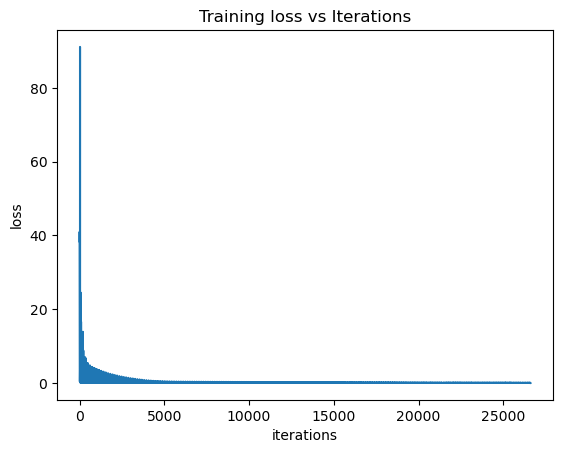

In [95]:
plt.plot(train_loss,'-')
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title('Training loss vs Iterations')
plt.show()


## Model 2

In [163]:
class RNN(nn.Module):

    def __init__(self, seq_len, num_classes, input_size, hidden_size, num_layers):
        super().__init__()
        self.seq_len = seq_len
        self.num_layers = num_layers
        self.input_size = input_size
        self.num_classes = num_classes
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # assuming batch_first = True for RNN cells
        x = x.permute(1, 0, 2) 
        batch_size = x.size(1)
        hidden = self._init_hidden(batch_size)
        

        rnn_out, _ = self.rnn(x, hidden)
        linear_out = self.linear(rnn_out.view(-1, hidden_size))
        return linear_out

    def _init_hidden(self, batch_size):
        return torch.zeros(batch_size, self.num_layers, self.hidden_size)

In [183]:
# hyperparameters
seq_len = 5    
input_size = 7   
batch_size = 5  
num_layers = 1   
num_classes = 7  
hidden_size = 133  

In [184]:
model = RNN(seq_len, num_classes, input_size, hidden_size, num_layers)
logits = model(X_Data)
print(logits[0:7])
print(logits.size())

RuntimeError: Expected hidden size (1, 5, 133), got [133, 1, 133]

In [ ]:
model = RNN(input_size, hidden_size, num_layers, num_classes)
out = model(X_Data)


## Model 3

In [4]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        
        super(RNN, self).__init__()
        
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
               
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # Set initial hidden states (and cell states for LSTM)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        #c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        
        # x: (n, 28, 28), h0: (2, n, 128)
        
        # Forward propagate RNN
        out, _ = self.rnn(x, h0)  
        # or:
        #out, _ = self.lstm(x, (h0,c0))  
        
        # out: tensor of shape (batch_size, seq_length, hidden_size)
        # out: (n, 28, 128)
        
        # Decode the hidden state of the last time step
        out = out[:, -1, :]
        # out: (n, 128)
         
        out = self.fc(out)
        # out: (n, 10)
        return out

In [5]:
# Hyper-parameters 
# input_size = 784 # 28x28
num_classes = 7
num_epochs = 2
batch_size = 133
learning_rate = 0.001

input_size = 7
sequence_length = 5
hidden_size = 128
num_layers = 1

In [6]:
model = RNN(input_size, hidden_size, num_layers, num_classes)
out = model(X_Data)
print(X_Data.shape)
print(out.shape)

torch.Size([133, 5, 7])
torch.Size([133, 7])


# Loss and optimizer

In [78]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model

## Train Data

In [8]:
data_x = X_Data[0:125]
data_y = Y_Data[0:125]

print(data_x.shape)
print(data_y.shape)


torch.Size([125, 5, 7])
torch.Size([125, 7])


In [76]:
# torch.Size([25, 5, 5, 7])
# torch.Size([25, 5, 7])

batch_size = 125
lote = 5
t = data_x.reshape(int(batch_size/lote),5,5,7)
o = data_y.reshape(int(batch_size/lote),lote,7)
print(t.shape)
print(o.shape)

torch.Size([25, 5, 5, 7])
torch.Size([25, 5, 7])


In [67]:
batch_size = len(X_Data)
lote = 1
t = X_Data.reshape(int(batch_size/lote),lote,5,7)
o = X_Data.reshape(int(batch_size/lote),lote,7)
print(t.shape)
print(o.shape)

RuntimeError: shape '[133, 1, 7]' is invalid for input of size 4655

## Train

In [77]:
# initializing lists to store losses over epochs:
train_loss = []
test_loss = []
train_iter = []
test_iter = []

In [111]:
# initializing lists to store losses over epochs:
train_loss = []
test_loss = []
train_iter = []
test_iter = []

n_total_steps = len(t)

for epoch in range(num_epochs):
    
    for i,(X, Y) in enumerate(zip(t, o)):
        
        print('-'.center(60,'-'))       
        optimizer.zero_grad()
        # Forward pass
        outputs = model(X)  
#         print(outputs.shape,labels.shape)
#         print(outputs,labels.shape)
        
        loss = criterion(outputs,Y)
        print(loss)
        
        # Backward and optimize        
        loss.backward()
        
        optimizer.step()
       
        train_loss.append(loss.data.tolist())
        
        if (i+1) % 100 == 0:
            
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, n_total_steps, loss.item()))
            
        
        
        

------------------------------------------------------------
tensor(0.2193, grad_fn=<MseLossBackward>)
------------------------------------------------------------
tensor(0.2786, grad_fn=<MseLossBackward>)
------------------------------------------------------------
tensor(0.6638, grad_fn=<MseLossBackward>)
------------------------------------------------------------
tensor(2.5502, grad_fn=<MseLossBackward>)
------------------------------------------------------------
tensor(2.1736, grad_fn=<MseLossBackward>)
------------------------------------------------------------
tensor(8.2186, grad_fn=<MseLossBackward>)
------------------------------------------------------------
tensor(0.0303, grad_fn=<MseLossBackward>)
------------------------------------------------------------
tensor(0.0244, grad_fn=<MseLossBackward>)
------------------------------------------------------------
tensor(0.1203, grad_fn=<MseLossBackward>)
------------------------------------------------------------
tensor(0.147

In [113]:
predicted

tensor([5, 5, 5, 5, 5])

# Test the model

In [64]:
model.eval()
with torch.no_grad():
    
    correct = 0
    total = 0

    for i,(X, Y) in enumerate(zip(t, o)):

        inputs = X
        labels = Y
        outputs = model(inputs)
        predicted = outputs.data
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total)) 

Test Accuracy of the model on the 10000 test images: 0.0 %


In [103]:
X_test[1].shape

torch.Size([1, 5, 7])

In [104]:
ee = X_test[1].reshape(1,5,7)
print(ee.shape)
print(ee)

torch.Size([1, 5, 7])
tensor([[[ 1.5000,  1.6750,  4.0267, -5.0587,  1.7490, 23.0131,  1.4844],
         [ 1.5000,  1.6750,  4.0267, -5.4528,  1.7523, 22.3591,  1.4661],
         [ 1.5000,  1.6750,  4.0267, -5.8468,  1.7556, 21.7051,  1.4479],
         [ 1.5000,  1.6750,  4.0267, -6.2329,  1.7587, 20.9865,  1.4297],
         [ 1.5000,  1.6750,  4.0267, -6.6190,  1.7619, 20.2679,  1.4115]]])


In [105]:
outputs = model(ee)
outputs

tensor([[ 1.6049,  1.6089,  4.1472, -6.7411,  1.9087, 19.5274,  1.4149]],
       grad_fn=<AddmmBackward>)

# Save the model checkpoint

In [106]:
# torch.save(model.state_dict(), 'model.ckpt')

In [110]:
torch.save({'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,   
            },'model.pth')